# Data Cleaning

Today, we will be cleaning up the titanic dataset.

## Import Library

In [1]:
# math
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Import Warnings
import warnings
warnings.simplefilter(action="ignore")

## Import Dataset 

In [2]:
df = pd.read_csv("titanic.tsv", sep='\t', decimal=',')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S,Titanic
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C,Titanic
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S,Titanic


In [3]:
# Checking data types
df.dtypes

PassengerId     int64
Survived        int64
Pclass         object
Name           object
Sex            object
Age            object
SibSp           int64
Parch          object
Ticket         object
Fare           object
Cabin          object
Embarked       object
ship           object
dtype: object

As we can see above, several columns do not match the data content. Among them, the Pclass, age, Parch, and Fare columns are of object data type, while the data is numeric. So, we can change it into numeric data types.

In [4]:
# Age Column
df['Pclass'] = pd.to_numeric(df.Pclass, errors='coerce')

# Age Column
df['Age'] = pd.to_numeric(df.Age, errors='coerce')

# Parch column
df['Parch'] = pd.to_numeric(df.Parch, errors='coerce')

# Fare Column
df['Fare'] = df['Fare'].str.replace(',','.')
df['Fare'] = pd.to_numeric(df.Fare, errors='coerce')




# Checking data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
ship            object
dtype: object

Now the table contents and data types are synchronized.

In [5]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0.0,A/5 21171,7.2500,NaN,S,Titanic
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0.0,PC 17599,71.2833,C85,C,Titanic
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0.0,STON/O2. 3101282,7.9250,NaN,S,Titanic


## Analysis

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,894.000000,894.000000,894.000000,696.000000,894.000000,893.000000,892.000000
mean,446.030201,0.381432,2.305369,36.203448,0.604027,0.371781,32.075985
std,259.208003,0.508529,0.847653,167.817961,2.571231,0.768325,49.868844
min,-12.000000,-4.000000,-2.000000,-12.000000,0.000000,0.000000,-90.000000
25%,223.250000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,444.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.750000,1.000000,3.000000,38.000000,1.000000,0.000000,30.771850
max,1143.000000,1.000000,3.000000,4435.000000,70.000000,5.000000,512.329200


## Checking Dataset Problem

In [7]:
print("The Dataset : ")
df.tail()

The Dataset : 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
889,890,1,1.0,"Behr, Mr. Karl Howell",male,26.0,0,0.0,111369,30.0000,C148,C,Titanic
890,891,0,3.0,"Dooley, Mr. Patrick",male,32.0,0,0.0,370376,7.7500,NaN,Q,Titanic
891,1000,1,1.0,Mr. Frederick Maxfield Hoyt,male,38.0,1,0.0,19943,90.0000,C93,S,Titanic
892,1143,1,3.0,"Sandstrom, Miss. Marguerite Ru&5$$",female,4.0,1,1.0,PP 9549,16.7000,G6,S,Titanic
893,-12,0,3.0,"Vestrom, Miss. Hulda Amanda Adolfina",female,0.7,0,0.0,350406,7.8542,NaN,S,Titanic


### Column Name

We can see the ship has a small latter, so we change it into capital to make easy in other steps.

In [8]:
df.rename(columns = {'ship':'Ship'}, inplace = True)
df.dtypes

PassengerId      int64
Survived         int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Ship            object
dtype: object

Looks better. Now, let's into another problem.

### Missing Values

#### Checking the amount of missing data.

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            198
SibSp            0
Parch            1
Ticket           1
Fare             2
Cabin          686
Embarked         2
Ship             0
dtype: int64

As we can see, there are some missing values. This will be a problem in itself because there are many of them. We will solve this problem with various techniques.

##### Age Column

In the age table, we will use the median age available in the dataset to fill in the missing values in the age column. This is because the data in the age column can be used for finding the average of the ship's passenger group.

In [10]:
df['Age'] = df['Age'].fillna(np.median(df['Age']))
print("Missing value of the age column solved")
print("-" * 100)

# Checking another missing value
print("Checking another missing value :")
df.isnull().sum()

Missing value of the age column solved
----------------------------------------------------------------------------------------------------
Checking another missing value :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            198
SibSp            0
Parch            1
Ticket           1
Fare             2
Cabin          686
Embarked         2
Ship             0
dtype: int64

#### Parch Column

In this table, we use the mean value to fill in the missing values because the distribution of the data values is symmetrical, and there are no clear outliers.

In [11]:
df['Parch'] = df['Parch'].fillna(np.mean(df['Parch']))
print("Missing value of the Parch column solved")
print("-" * 100)

# Checking another missing value
print("Checking another missing value :")
df.isnull().sum()

Missing value of the Parch column solved
----------------------------------------------------------------------------------------------------
Checking another missing value :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            198
SibSp            0
Parch            0
Ticket           1
Fare             2
Cabin          686
Embarked         2
Ship             0
dtype: int64

#### Ticket Column

Since this table is an object, we use mode to find the most frequent value.

In [12]:
df['Ticket'].mode()

0        1601
1    CA. 2343
Name: Ticket, dtype: object

In [13]:
df['Ticket'].fillna(df['Ticket'].mode()[0], inplace=True)
print("Missing value of the ticket column solved")
print("-" * 100)

# Checking another missing value
print("Checking another missing value :")
df.isnull().sum()

Missing value of the ticket column solved
----------------------------------------------------------------------------------------------------
Checking another missing value :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            198
SibSp            0
Parch            0
Ticket           0
Fare             2
Cabin          686
Embarked         2
Ship             0
dtype: int64

#### Fare Column

In this table, we use the mean value to fill in the missing values because the distribution of the data values is symmetrical, and there are no clear outliers.

In [14]:
df['Fare'] = df['Fare'].fillna(np.mean(df['Fare']))
print("Missing value of the Fare column solved")
print("-" * 100)

# Checking another missing value
print("Checking another missing value :")
df.isnull().sum()

Missing value of the Fare column solved
----------------------------------------------------------------------------------------------------
Checking another missing value :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            198
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
Ship             0
dtype: int64

#### Cabin Column

Since this table is an object, we use mode to find the most frequent value.

In [15]:
df['Cabin'].mode()

0    G6
Name: Cabin, dtype: object

Since the most frequent data is G6, the missing value in this table will be G6.

In [16]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
print("Missing value of the cabin column solved")
print("-" * 100)

# Checking another missing value
print("Checking another missing value :")
df.isnull().sum()

Missing value of the cabin column solved
----------------------------------------------------------------------------------------------------
Checking another missing value :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            198
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
Ship             0
dtype: int64

#### Embarked Column

Since this table is an object, we use mode to find the most frequent value

In [17]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

Since the most frequent data is "S", the missing value in this table will be "S".

In [18]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print("Missing value of the Embarked column solved")
print("-" * 100)

# Checking another missing value
print("Checking another missing value :")
df.isnull().sum()

Missing value of the Embarked column solved
----------------------------------------------------------------------------------------------------
Checking another missing value :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            198
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Ship             0
dtype: int64

Now, all columns don't have the missing values.

### Labelling Dataset Problem

##### Sex Column

In [19]:
df['Sex'].value_counts()

male       575
female     310
fem          2
malef        1
mal          1
femmale      1
feemale      1
Female       1
malee        1
F            1
Name: Sex, dtype: int64

In this gender column, we can see the inconsistency in gender labeling. So we change it to male and female.

The labels malef, male, and malee change to male. Then, fem, femmale, feemale, Female, and F change to female. Therefore, this column will only have two labels (male and female).

In [20]:
# Replace the value in columns Sex

# male
df['Sex'] = df['Sex'].replace(['malef', 'mal', 'malee'], 'male')

# female
df['Sex'] = df['Sex'].replace(['fem', 'femmale', 'feemale', 'Female','F'], 'female')

df['Sex'].value_counts()

male      578
female    316
Name: Sex, dtype: int64

##### Embarked Column

In [21]:
df['Embarked'].value_counts()

S     647
C     167
Q      76
So      2
Co      1
Qe      1
Name: Embarked, dtype: int64

In this embarked column, we can see the inconsistency in the labeling. So we change it to S, C and Q.

So into S
Co into Co
Qe into Q

In [22]:
# Replace the value in columns Embarked

df['Embarked'] = df['Embarked'].replace(['So'], 'S')
df['Embarked'] = df['Embarked'].replace(['Co'], 'C')
df['Embarked'] = df['Embarked'].replace(['Qe'], 'Q')

df['Embarked'].value_counts()

S    649
C    168
Q     77
Name: Embarked, dtype: int64

##### Titanic Column

In [23]:
df['Ship'].value_counts()

Titanic    892
Titani       1
Titnic       1
Name: Ship, dtype: int64

As we can see, there are some values. It suppose Titanic. Then, we replace Titani and Titnic to Titanic.

In [24]:
# Replace the value in columns Embarked

df['Ship'] = df['Ship'].replace(['Titani', 'Titnic'], 'Titanic')

df['Ship'].value_counts()

Titanic    894
Name: Ship, dtype: int64

In [25]:
print("The Results")
print("-" * 100)
df.head(2)

The Results
----------------------------------------------------------------------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ship
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0.0,A/5 21171,7.2500,G6,S,Titanic
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0.0,PC 17599,71.2833,C85,C,Titanic


### Outlier Detection

In [26]:
# analysis
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,894.000000,894.000000,894.000000,696.000000,894.000000,894.000000,894.000000
mean,446.030201,0.381432,2.305369,36.203448,0.604027,0.371781,32.075985
std,259.208003,0.508529,0.847653,167.817961,2.571231,0.767895,49.812969
min,-12.000000,-4.000000,-2.000000,-12.000000,0.000000,0.000000,-90.000000
25%,223.250000,0.000000,2.000000,20.000000,0.000000,0.000000,7.903100
50%,444.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.750000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1143.000000,1.000000,3.000000,4435.000000,70.000000,5.000000,512.329200


##### Column Survived

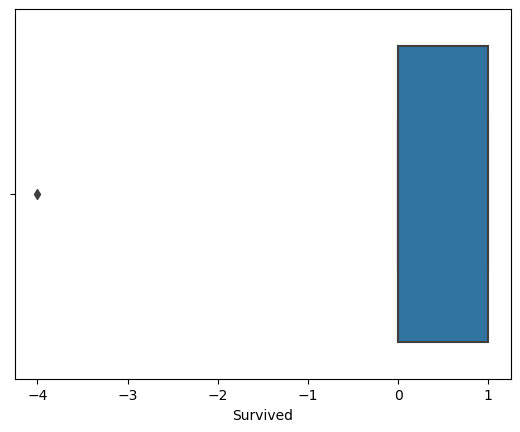

In [27]:
# Outliers Detection

sns.boxplot(x=df['Survived'])
plt.show()

In [28]:
# Column Survived
df['Survived'].value_counts()

 0    548
 1    345
-4      1
Name: Survived, dtype: int64

In survived columns, the minimum value is -4, and the maximum is 1, but we can see this column has a mean value bigger than zero. So, we will change -4 into 0 since it is below the mean value.

Only one data has -4. Now, we replace it into 0. Hence, the survived column only has two values (0 and 1).

In [29]:
# Replace the value in columns Survived
df['Survived'] = df['Survived'].replace([-4], 0)
df['Survived'].value_counts()

0    549
1    345
Name: Survived, dtype: int64

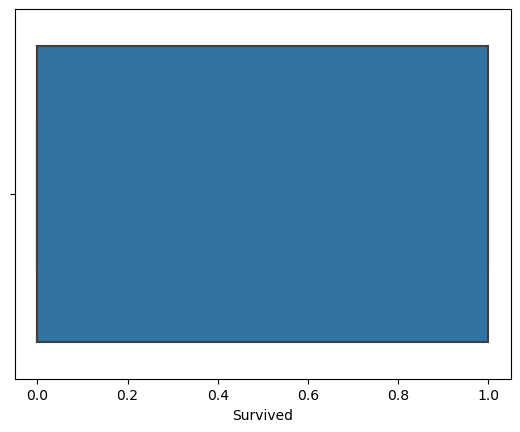

In [30]:
# Outliers Detection

sns.boxplot(x=df['Survived'])
plt.show()

##### Column Pclass

Pclass column has a mean value bigger than 0, but it has a minimum value of -2, which is lower than the mean value. Let's look at the values.

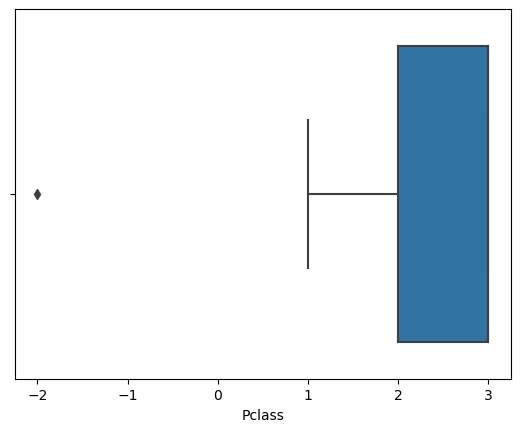

In [31]:
# Outliers Detection

sns.boxplot(x=df['Pclass'])
plt.show()

In [32]:
df['Pclass'].value_counts()

 3.0    493
 1.0    216
 2.0    184
-2.0      1
Name: Pclass, dtype: int64

As we can see, only 1 data has -2.0. We can replace it with a minimum value (1) because it is also lower than the mean value. Then, this column will have three values (3.0, 2.0, and 1.0).

In [33]:
df['Pclass'] = df['Pclass'].replace([-2], 1)
df['Pclass'].value_counts()

3.0    493
1.0    217
2.0    184
Name: Pclass, dtype: int64

The Results
----------------------------------------------------------------------------------------------------


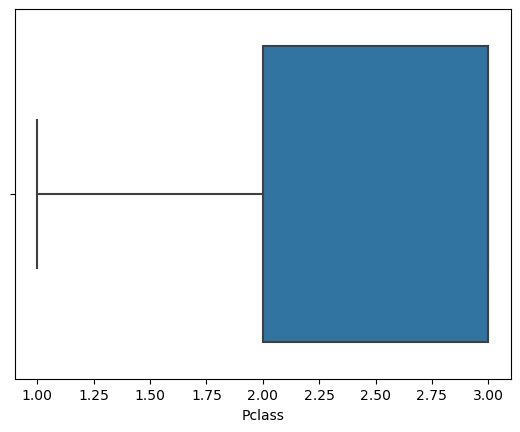

In [34]:
print("The Results")
print("-" * 100)

# Outliers Detection

sns.boxplot(x=df['Pclass'])
plt.show()

##### Column Age

The age column has significant data inequality with a minimum value of -2 and a maximum of more than 4,000. Meanwhile, the mean value of the age column is 36.20.

In [35]:
df['Age'].value_counts()

 24.0      30
 22.0      27
 18.0      26
 19.0      25
 28.0      24
           ..
-3.0        1
 4435.0     1
 66.0       1
 12.0       1
 0.7        1
Name: Age, Length: 76, dtype: int64

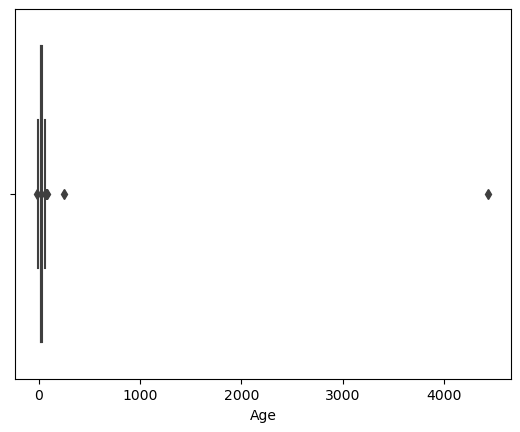

In [36]:
# Outliers Detection

sns.boxplot(x=df['Age'])
plt.show()

Because age has a varied range, we choose the Winsorizing to replace with other values. Common is replacing the outliers on th upper side with 75% percentile value and outlier on the lower side with 25% percentile.

In [37]:
from scipy.stats.mstats import winsorize
from scipy.stats import mstats

df['Age'] = winsorize(df['Age'], limits = 0.25)

Check the Result

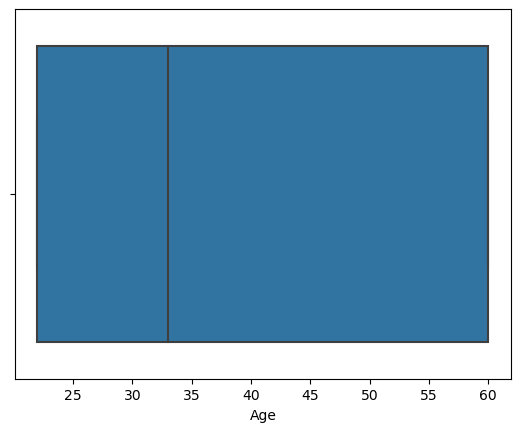

In [38]:
# Outliers Detection

sns.boxplot(x=df['Age'])
plt.show()

##### SibSp Column

In this column, the maximum value is 70.00, and the minimum value is 0, but we can see this column has a mean value more than zero. Because this column has a gap in data, we decide to use the Winsorize again.

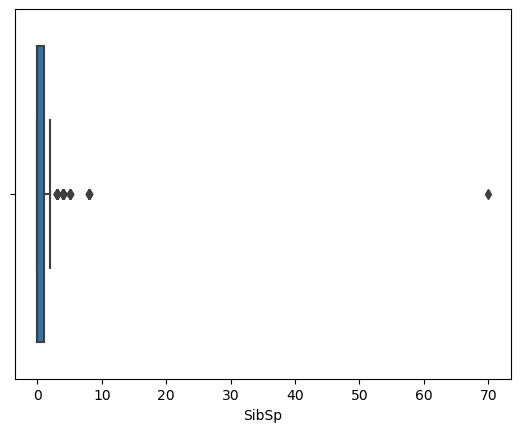

In [39]:
# Outliers Detection

sns.boxplot(x=df['SibSp'])
plt.show()

In [40]:
df['SibSp'].value_counts()

0     606
1     213
2      28
4      18
3      16
8       7
5       5
70      1
Name: SibSp, dtype: int64

As we can there a lot of range data, the standar deviation is only 2, so we change the values which are bigger than 2 into two and below to 0 into 0.

In [41]:
df['SibSp'] = df['SibSp'].replace([70, 5, 8, 3, 4], 2)
df['SibSp'].value_counts()

0    606
1    213
2     75
Name: SibSp, dtype: int64

Check the result


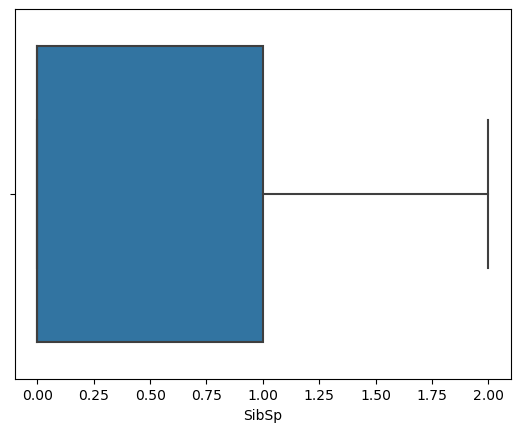

In [42]:
print("Check the result")

# Outliers Detection

sns.boxplot(x=df['SibSp'])
plt.show()

Looks nice

#### Parch Column

In this column, the maximum value is bigger than 4000, while the minimum value is -12, but we can see this column has a mean value equal 36. Because this column has a gap in data, we decide to use the Winisorizing again.

Checking Outlier


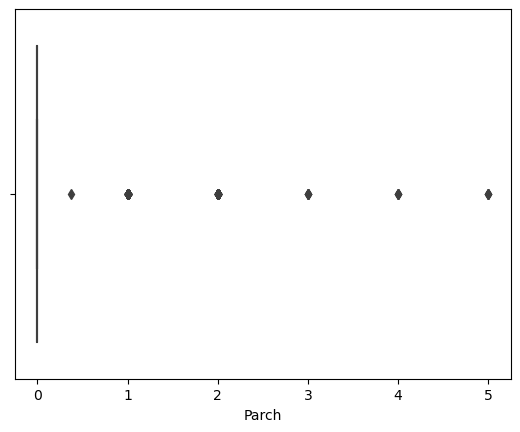

In [43]:
# Outliers Detection

print("Checking Outlier")
sns.boxplot(x=df['Parch'])
plt.show()

In [44]:
# Checking the values
df['Parch'].value_counts()

0.000000    679
1.000000    121
2.000000     80
3.000000      5
5.000000      4
4.000000      4
0.371781      1
Name: Parch, dtype: int64

Because Parch has a varied range, we choose the Winsorizing to replace with other values. Common is replacing the outliers on th upper side with 75% percentile value and outlier on the lower side with 25% percentile.

Check the result


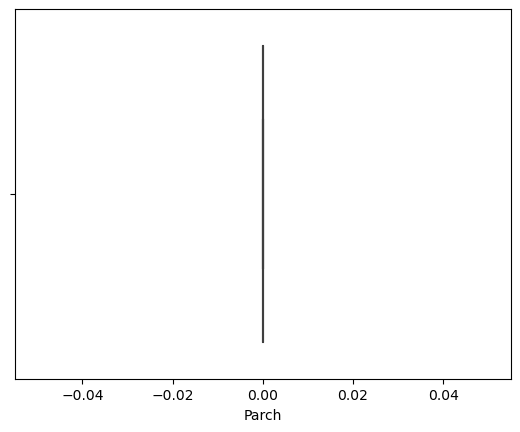

In [45]:
df['Parch'] = winsorize(df['Parch'], limits = 0.25)

print("Check the result")

# Outliers Detection

sns.boxplot(x=df['Parch'])
plt.show()

##### Fare Column

In this column, the maximum value is bigger than 4000, while the minimum value is -12, but we can see this column has a mean value equal 36. Because this column has a gap in data, we decide to use the Wonorize again.

Checking Outlier


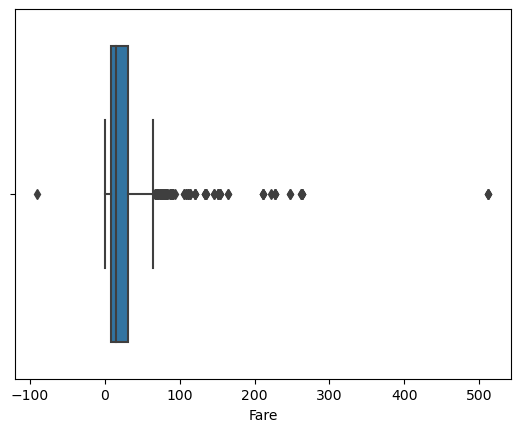

In [46]:
# Outliers Detection

print("Checking Outlier")
sns.boxplot(x=df['Fare'])
plt.show()

In [47]:
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
28.5000     1
6.2375      1
14.0000     1
9.4750      1
10.5167     1
Name: Fare, Length: 250, dtype: int64

Because Fare has a varied range, we choose the Winsorizing to replace with other values. Common is replacing the outliers on th upper side with 75% percentile value and outlier on the lower side with 25% percentile.

Check the result


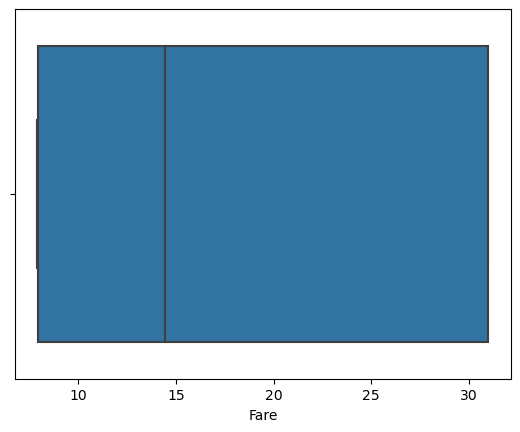

In [48]:
df['Fare'] = winsorize(df['Fare'], limits = 0.25)

print("Check the result")

# Outliers Detection

sns.boxplot(x=df['Fare'])
plt.show()

### Data Duplicated

In [49]:
#identify duplicate rows
duplicateRows = df[df.duplicated()]
print(duplicateRows)

     PassengerId  Survived  Pclass                                Name  \
13            11         1     3.0  Sandstrom, Miss. Marguerite Ru&5$$   
23            11         1     3.0  Sandstrom, Miss. Marguerite Ru&5$$   
520          225         1     1.0        Hoyt, Mr. Frederick Maxfield   

        Sex   Age  SibSp  Parch   Ticket  Fare Cabin Embarked     Ship  
13   female  22.0      1    0.0  PP 9549  16.7    G6        S  Titanic  
23   female  22.0      1    0.0  PP 9549  16.7    G6        S  Titanic  
520    male  38.0      1    0.0    19943  31.0   C93        S  Titanic  


As we can see, there are some duplicated data. We decide to keep the first row and drop another duplicated rows.

In [50]:
# Using DataFrame.drop_duplicates() to keep first duplicate row
df2 = df.drop_duplicates(keep='first')
print(df2)

     PassengerId  Survived  Pclass  \
0              1         0     3.0   
1              2         1     1.0   
2              3         1     3.0   
3              4         1     1.0   
4              5         0     3.0   
..           ...       ...     ...   
889          890         1     1.0   
890          891         0     3.0   
891         1000         1     1.0   
892         1143         1     3.0   
893          -12         0     3.0   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## Result

In [51]:
df2.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ship
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0.0,A/5 21171,7.8958,G6,S,Titanic
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0.0,PC 17599,31.0000,C85,C,Titanic
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0.0,STON/O2. 3101282,7.9250,G6,S,Titanic
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0.0,113803,31.0000,C123,S,Titanic
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0.0,373450,8.0500,G6,S,Titanic
5,6,0,3.0,"Moran, Mr. James",male,60.0,0,0.0,330877,8.4583,G6,Q,Titanic
6,7,0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0,0.0,17463,31.0000,E46,S,Titanic
7,8,0,3.0,"Palsson, Master. Gosta Leonard",male,22.0,2,0.0,349909,21.0750,G6,S,Titanic
8,9,1,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,0.0,347742,11.1333,G6,S,Titanic
9,10,1,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,22.0,1,0.0,237736,30.0708,G6,C,Titanic


In [52]:
df2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000
mean,447.254770,0.383838,2.308642,38.164983,0.404040,0.0,18.023906
std,258.715268,0.486592,0.836071,15.290253,0.640001,0.0,9.807991
min,-12.000000,0.000000,1.000000,22.000000,0.000000,0.0,7.895800
25%,224.500000,0.000000,2.000000,22.000000,0.000000,0.0,7.895800
50%,446.000000,0.000000,3.000000,33.000000,0.000000,0.0,14.454200
75%,669.500000,1.000000,3.000000,60.000000,1.000000,0.0,31.000000
max,1143.000000,1.000000,3.000000,60.000000,2.000000,0.0,31.000000


Data is already cleaning. Now, we check the outlier detection

##### Saving New DataFrame

In [53]:
# saving the dataframe
df2.to_csv('cleaning.csv')